In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
mpl.rc('font',size=14)
mpl.rc("figure", figsize=(8,4))

In [37]:
df = pd.read_csv('alpha-range.csv')

In [38]:
df

,Channel,61,57,53,48,44,39,22,4,0
0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2043,2043,0,0,0,0,0,0,0,0,0
2044,2044,0,0,0,0,0,0,0,0,0
2045,2045,0,0,0,0,0,0,0,0,0
2046,2046,0,0,0,0,0,0,0,0,0


In [64]:
col = df.columns
data = df.to_numpy()[::-1]

In [65]:
data

array([[2047,    0,    0, ...,    0,    0,    0],
       [2046,    0,    0, ...,    0,    0,    0],
       [2045,    0,    0, ...,    0,    0,    0],
       ...,
       [   2,    0,    0, ...,    0,    0,    0],
       [   1,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0]])

In [66]:
col

Index(['Channel', '61', '57', '53', '48', '44', '39', '22', '4', '0'], dtype='object')

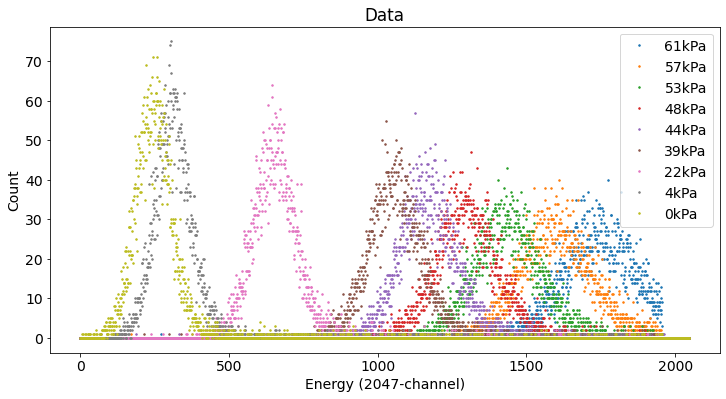

In [93]:
plt.figure(figsize=(12,6))
for index, channel in enumerate(col[1:]): 
    plt.plot(data[:,index+1],".",ms=3,label=channel+"kPa")
#     idmax = df[channel].idxmax()
#     maxValue = df[channel][idmax]
    #plt.scatter(idmax, maxValue)
plt.title("Data")
plt.xlabel("Energy (2047-channel)")
plt.ylabel("Count")
plt.legend()

I will call the x axis above (2047-channel), x. 
as it can be seen from the plot above, x=2000 (channel=0) corresponds to the particles with highest energy (E_max=5.486 MeV). and x= (channel=2047) corresponds to the particles with lowest energy (E_min=0 MeV).
So the linear relation between E and channel number will be:

$E = E_{max} (1-channel/2047)$

In [96]:
E_list = (1-data[:,0][::-1]/2047)

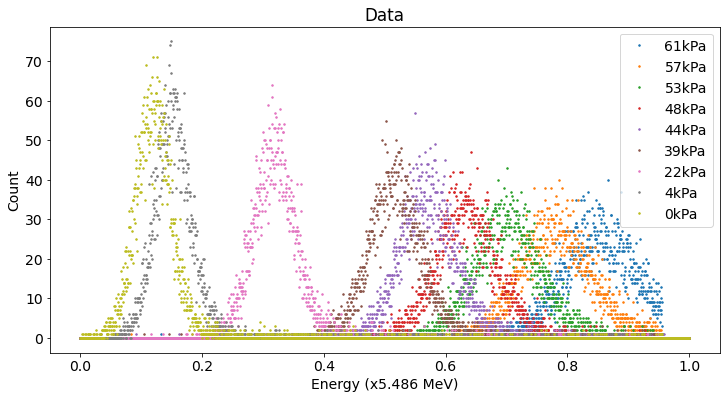

In [99]:
plt.figure(figsize=(12,6))
for index, channel in enumerate(col[1:]): 
    plt.plot(E_list ,data[:,index+1][::-1],".",ms=3,label=channel+"kPa")
#     idmax = df[channel].idxmax()
#     maxValue = df[channel][idmax]
    #plt.scatter(idmax, maxValue)
plt.title("Data")
plt.xlabel("Energy (x5.486 MeV)")
plt.ylabel("Count")
plt.legend()

In [79]:
pressure = []
for elem in col[1:]:
    pressure.append(int(elem))
    
pressure[-1] += 0.1

In [80]:
pressure

[61, 57, 53, 48, 44, 39, 22, 4, 0.1]

In [81]:
effective_length = []
for elem in pressure:
    effective_length.append(elem/pressure[-1])

In [82]:
effective_length

[610.0, 570.0, 530.0, 480.0, 440.0, 390.0, 220.0, 40.0, 1.0]

In [112]:
x_energy = data.argmax(axis=0)[::-1]
energy = (1-x_energy[:-1]/2047)
energy

array([0.88128969, 0.85148999, 0.68490474, 0.49829018, 0.45090376,
       0.35906204, 0.29848559, 0.21348315, 0.13385442])

In [113]:
x_energy

array([ 243,  304,  645, 1027, 1124, 1312, 1436, 1610, 1773,    0])

Text(0, 0.5, 'energy(x5.486 MeV)')

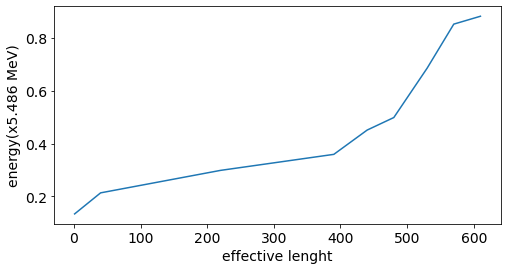

In [118]:
plt.plot(effective_length, energy)
#plt.plot(energy[1:])
plt.xlabel("effective lenght")
plt.ylabel("energy(x5.486 MeV)")